In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split = 0.1,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'flowers',
        target_size=(230, 230),
        batch_size=256,
        class_mode='categorical',
        subset='training')

valid_generator = train_datagen.flow_from_directory(
        'flowers', 
        target_size=(230, 230),
        batch_size=256,
        class_mode='categorical',
        subset='validation') 

Found 3893 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In order to overcome over-fitting, the model is introduced into l2 regularization.

In [3]:
from tensorflow.keras import regularizers

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(230,230,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 228, 228, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 114, 114, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 32)        1

In [4]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [5]:
history = model.fit_generator(train_generator, epochs=100, verbose=1, callbacks=None,validation_data=valid_generator)

D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
16/16 [==============================] - 40s 2s/step - loss: 2.0996 - accuracy: 0.4703 - val_loss: 2.2046 - val_accuracy: 0.2465
Epoch 2/100
16/16 [==============================] - 33s 2s/step - loss: 1.6810 - accuracy: 0.6018 - val_loss: 2.5385 - val_accuracy: 0.2442
Epoch 3/100
16/16 [==============================] - 33s 2s/step - loss: 1.4771 - accuracy: 0.6748 - val_loss: 2.8774 - val_accuracy: 0.2442
Epoch 4/100
16/16 [==============================] - 33s 2s/step - loss: 1.3662 - accuracy: 0.7156 - val_loss: 3.2411 - val_accuracy: 0.2442
Epoch 5/100
16/16 [==============================] - 33s 2s/step - loss: 1.2949 - accuracy: 0.7411 - val_loss: 3.5234 - val_accuracy: 0.2442
Epoch 6/100
16/16 [==============================] - 33s 2s/step - loss: 1.2337 - accuracy: 0.7611 - val_loss: 3.2321 - val_accuracy: 0.2442
Epoch 7/100
16/16 [==============================] - 33s 2s/step - loss: 1.1599 - accuracy: 0.7935 - val_loss: 3.8950 - val_accuracy: 0.2442
Epoch 8/100
1

Epoch 59/100
16/16 [==============================] - 33s 2s/step - loss: 0.5543 - accuracy: 0.9933 - val_loss: 1.9045 - val_accuracy: 0.6605
Epoch 60/100
16/16 [==============================] - 33s 2s/step - loss: 0.5509 - accuracy: 0.9951 - val_loss: 1.9039 - val_accuracy: 0.7023
Epoch 61/100
16/16 [==============================] - 33s 2s/step - loss: 0.5464 - accuracy: 0.9943 - val_loss: 1.8456 - val_accuracy: 0.6605
Epoch 62/100
16/16 [==============================] - 33s 2s/step - loss: 0.5475 - accuracy: 0.9931 - val_loss: 1.7724 - val_accuracy: 0.6860
Epoch 63/100
16/16 [==============================] - 33s 2s/step - loss: 0.5391 - accuracy: 0.9961 - val_loss: 1.7986 - val_accuracy: 0.6814
Epoch 64/100
16/16 [==============================] - 33s 2s/step - loss: 0.5379 - accuracy: 0.9956 - val_loss: 1.8452 - val_accuracy: 0.6837
Epoch 65/100
16/16 [==============================] - 33s 2s/step - loss: 0.5325 - accuracy: 0.9959 - val_loss: 1.8509 - val_accuracy: 0.6907
Epoch 

In [6]:
model.save('flowers_classification_l2.h5')

How about using VGG16 to train?

In [8]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(230, 230, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 230, 230, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 230, 230, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 230, 230, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 115, 115, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 115, 115, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 115, 115, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 57, 57, 128)       0     

In [11]:
new_model = Sequential()
new_model.add(conv_base)
new_model.add(Flatten())
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(5, activation='softmax'))

new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


In [12]:
conv_base.trainable = False
new_model.trainable_weights

[<tf.Variable 'dense_2/kernel:0' shape=(25088, 256) dtype=float32, numpy=
 array([[ 1.4506677e-02, -7.2531477e-03,  1.2565365e-02, ...,
         -5.7840403e-03, -9.1491453e-03, -5.9709977e-03],
        [-4.8454851e-03,  5.4381676e-03, -8.9816079e-03, ...,
          6.8381112e-03,  2.0363182e-03, -7.1099550e-03],
        [-1.5010033e-04,  1.0426702e-02, -1.2115955e-02, ...,
          1.4934935e-02,  6.3307285e-03, -1.6168747e-03],
        ...,
        [-1.4312244e-02, -9.5645152e-03,  6.7669693e-03, ...,
         -4.8937611e-03,  6.0494728e-03,  1.0443030e-02],
        [-1.4197056e-02, -2.2356147e-03, -2.9176604e-03, ...,
          1.0185493e-02,  2.0414013e-03, -1.2882459e-02],
        [-3.7555555e-03, -6.6137873e-05,  2.6602950e-03, ...,
         -1.0194851e-02,  5.9668422e-03, -1.3669234e-02]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(256,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0

In [13]:
new_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
history = new_model.fit(
        train_generator,
        epochs=50,
        validation_data=valid_generator,)

Epoch 1/50
16/16 [==============================] - 52s 3s/step - loss: 1.2270 - accuracy: 0.5071 - val_loss: 0.8694 - val_accuracy: 0.6419
Epoch 2/50
16/16 [==============================] - 33s 2s/step - loss: 0.7682 - accuracy: 0.7159 - val_loss: 0.6864 - val_accuracy: 0.7651
Epoch 3/50
16/16 [==============================] - 33s 2s/step - loss: 0.6159 - accuracy: 0.7876 - val_loss: 0.6324 - val_accuracy: 0.8000
Epoch 4/50
16/16 [==============================] - 33s 2s/step - loss: 0.5344 - accuracy: 0.8207 - val_loss: 0.5763 - val_accuracy: 0.8070
Epoch 5/50
16/16 [==============================] - 34s 2s/step - loss: 0.4715 - accuracy: 0.8413 - val_loss: 0.5833 - val_accuracy: 0.7814
Epoch 6/50
16/16 [==============================] - 33s 2s/step - loss: 0.4299 - accuracy: 0.8592 - val_loss: 0.5320 - val_accuracy: 0.8163
Epoch 7/50
16/16 [==============================] - 33s 2s/step - loss: 0.4107 - accuracy: 0.8628 - val_loss: 0.5164 - val_accuracy: 0.8186
Epoch 8/50
16/16 [==

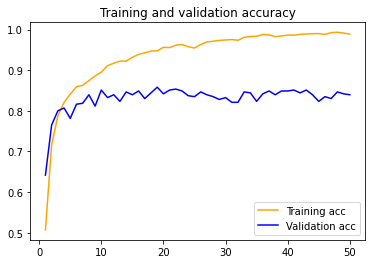

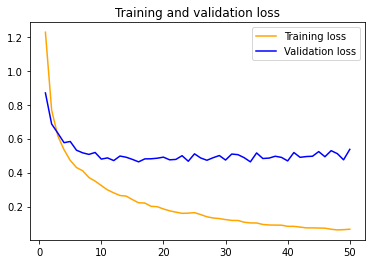

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
new_model.save('flowers_vgg.h5')

In [24]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(230, 230, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
finetune_model = Sequential()
finetune_model.add(conv_base)
finetune_model.add(Flatten())
finetune_model.add(Dense(256, activation='relu'))
finetune_model.add(Dense(5, activation='softmax'))

finetune_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [26]:
finetune_model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [27]:
history = finetune_model.fit(
        train_generator,
        epochs=50,
        validation_data=valid_generator,)

Epoch 1/50
16/16 [==============================] - 36s 2s/step - loss: 0.9807 - accuracy: 0.6219 - val_loss: 0.6043 - val_accuracy: 0.7744
Epoch 2/50
16/16 [==============================] - 33s 2s/step - loss: 0.4824 - accuracy: 0.8274 - val_loss: 0.4913 - val_accuracy: 0.8349
Epoch 3/50
16/16 [==============================] - 33s 2s/step - loss: 0.3256 - accuracy: 0.8849 - val_loss: 0.3966 - val_accuracy: 0.8674
Epoch 4/50
16/16 [==============================] - 33s 2s/step - loss: 0.2521 - accuracy: 0.9098 - val_loss: 0.4563 - val_accuracy: 0.8395
Epoch 5/50
16/16 [==============================] - 33s 2s/step - loss: 0.2047 - accuracy: 0.9291 - val_loss: 0.3778 - val_accuracy: 0.8651
Epoch 6/50
16/16 [==============================] - 33s 2s/step - loss: 0.1336 - accuracy: 0.9522 - val_loss: 0.4187 - val_accuracy: 0.8651
Epoch 7/50
16/16 [==============================] - 33s 2s/step - loss: 0.1121 - accuracy: 0.9640 - val_loss: 0.4222 - val_accuracy: 0.8698
Epoch 8/50
16/16 [==

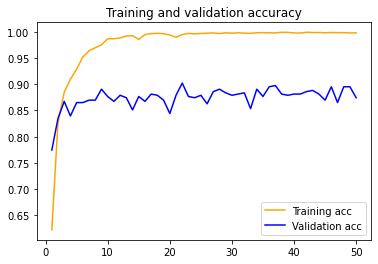

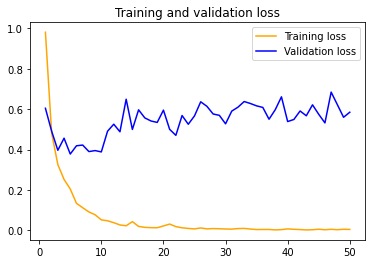

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'orange', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()